In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
 df = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Excelr.dataset\\drugsCom_raw (1).tsv", delimiter='\t', encoding='ISO-8859-1')


In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,161297.0,NaN,NaN,NaN,115923.585305,67004.44517,2.0,58063.0,115744.0,173776.0,232291.0
drugName,161297,3436,Levonorgestrel,3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,160398,884,Birth Control,28788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review,161297,112329,"""Good""",33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,161297.0,NaN,NaN,NaN,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
date,161297,3579,"March 1, 2016",146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usefulCount,161297.0,NaN,NaN,NaN,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


In [7]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [8]:
df['condition'].value_counts()

condition
Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: count, Length: 884, dtype: int64

In [9]:
df = df[df['condition'].isin(['Depression', 'High Blood Pressure', 'Diabetes, Type 2'])]

In [10]:
df['condition'].value_counts()

condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [12]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%B %d, %Y')

In [13]:
df.head()

,drugName,condition,review,rating,date,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,2017-03-09,54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07,3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,2016-04-27,3
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,2017-10-24,24
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,2013-06-20,166


In [14]:
df.shape

(13944, 6)

In [15]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [16]:
df['condition'].value_counts()

condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64

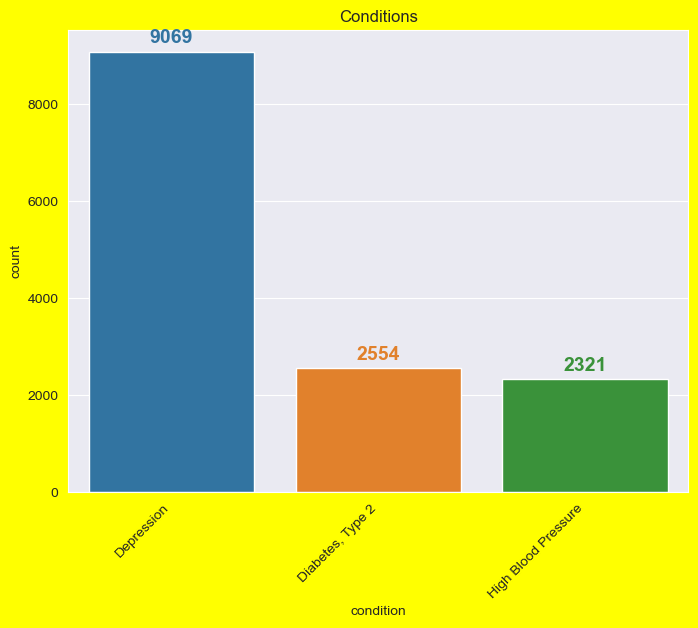

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6),facecolor ='yellow')
ax=sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14,fontweight='bold', color=p.get_facecolor())
plt.xticks(rotation=45, ha='right')
plt.title('Conditions')
plt.show()

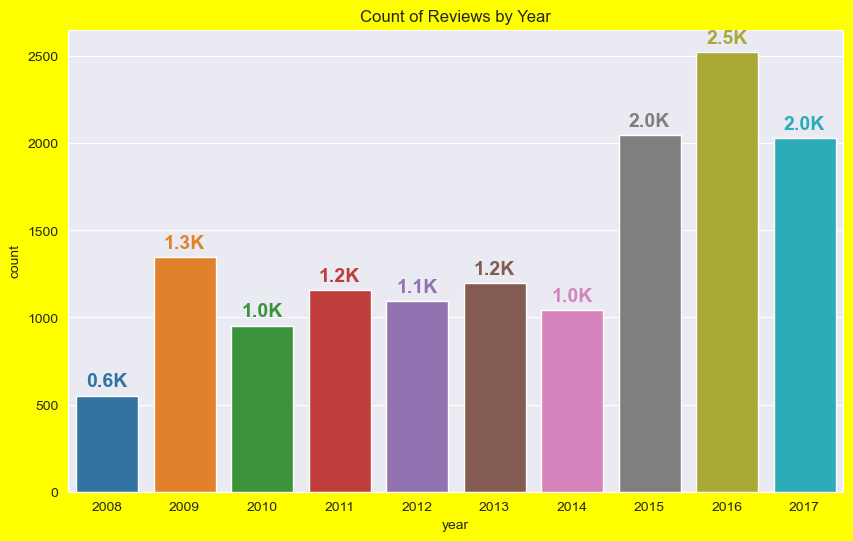

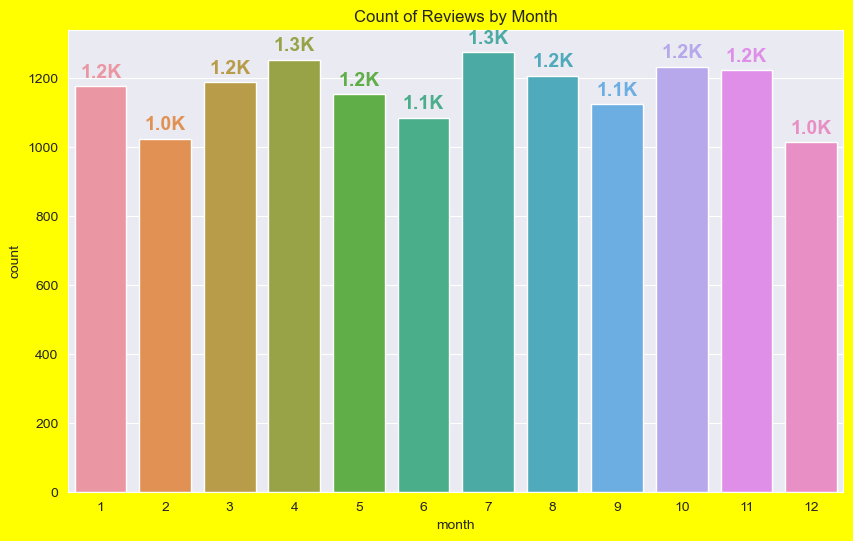

In [18]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create new columns for year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# Plot count of reviews by year
plt.figure(figsize=(10,6),facecolor='yellow')
ax=sns.countplot(x='year', data=df)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
               (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, fontweight='bold', color=p.get_facecolor())
plt.title('Count of Reviews by Year')
plt.show()

# Plot count of reviews by month
plt.figure(figsize=(10,6),facecolor='yellow')
ax=sns.countplot(x='month', data=df)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
               (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14,fontweight='bold', color=p.get_facecolor())
plt.title('Count of Reviews by Month')
plt.show()

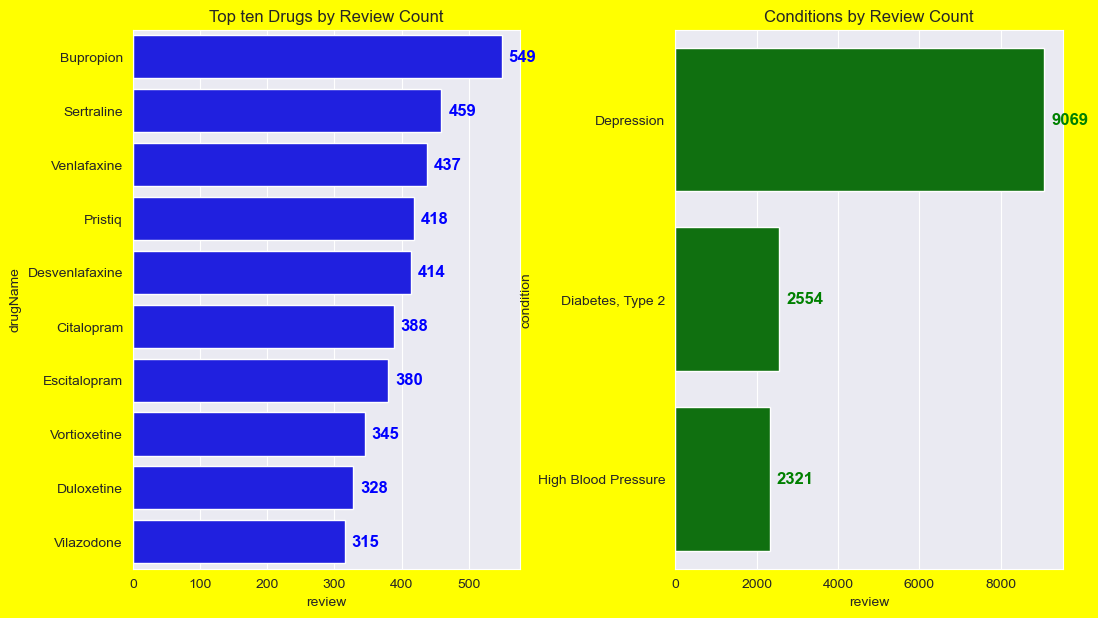

In [19]:
# Count the number of reviews for each drug
drug_count = df.groupby('drugName')['review'].count().sort_values(ascending=False)[:10]
# Count the number of reviews for each condition
condition_count = df.groupby('condition')['review'].count().sort_values(ascending=False)[:10]

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 7),facecolor='Yellow')

# Plot the bar chart for drug count on the first subplot
sns.barplot(x=drug_count, y=drug_count.index, ax=axs[0], color='b')
axs[0].set_title('Top ten Drugs by Review Count')

# Annotate the bar chart for drug count
for p in axs[0].patches:
    axs[0].annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha = 'left', va = 'center', xytext = (5, 0), 
                    textcoords = 'offset points', fontsize=12,fontweight='bold', color='blue')

# Plot the bar chart for condition count on the second subplot
sns.barplot(x=condition_count, y=condition_count.index, ax=axs[1], color='g')
axs[1].set_title( 'Conditions by Review Count')

# Annotate the bar chart for condition count
for p in axs[1].patches:
    axs[1].annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha = 'left', va = 'center', xytext = (5, 0), 
                    textcoords = 'offset points', fontsize=12,fontweight ='bold', color='green')

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

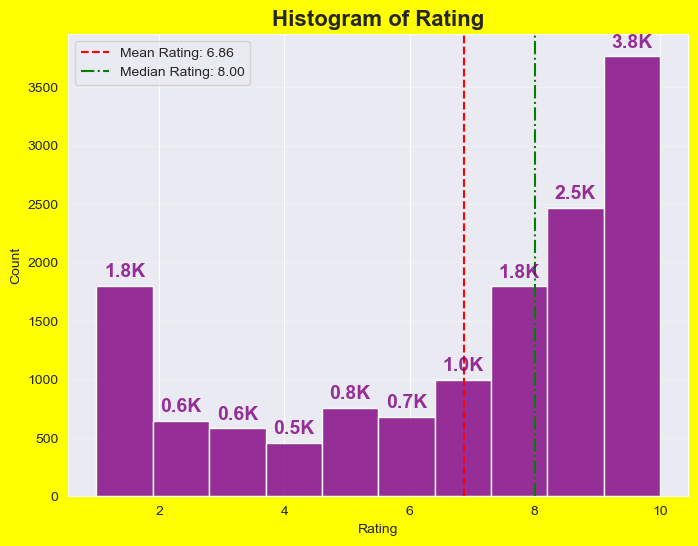

In [20]:
plt.figure(figsize=(8,6),facecolor='yellow')
ax=sns.histplot(data=df , x='rating',bins=10,color='purple',alpha=0.8)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14,fontweight='bold', color=p.get_facecolor())
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Rating', fontsize=16, fontweight='bold')

mean_rating =df['rating'].mean()
median_rating =df['rating'].median()
plt.axvline(x=mean_rating, color='red', linestyle='--', label=f'Mean Rating: {mean_rating:.2f}')
plt.axvline(x=median_rating, color='green', linestyle='-.', label=f'Median Rating: {median_rating:.2f}')

# Add legend and gridlines
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.show()

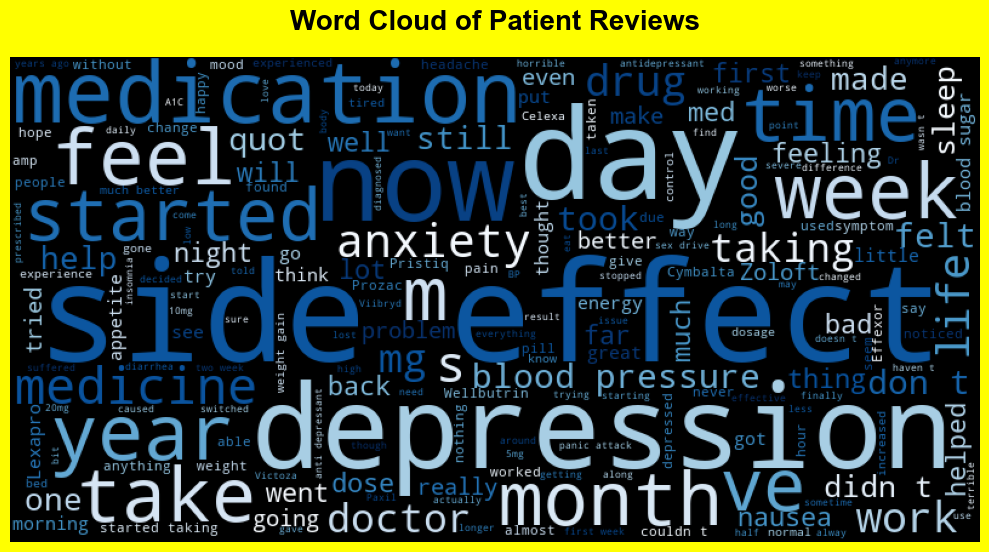

In [21]:
plt.figure(figsize=(10,8),facecolor='yellow')
text = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='Black', colormap='Blues', max_words=200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Patient Reviews',color='black',fontweight='bold', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

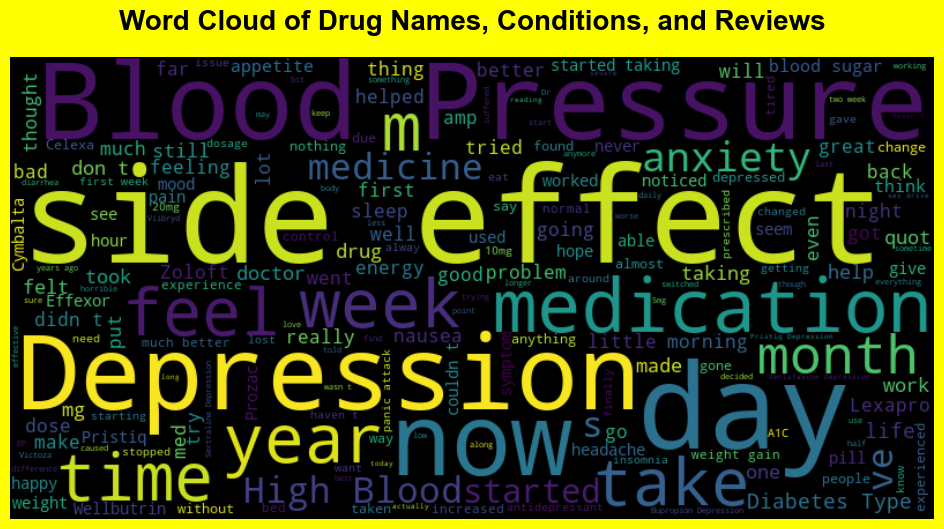

In [23]:
# Combine the text from drugName, condition, and review columns
text = ' '.join(df['drugName'].fillna('') + ' ' + df['condition'].fillna('') + ' ' + df['review'].fillna(''))

# Generate the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6),facecolor='yellow')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Drug Names, Conditions, and Reviews',color='black',fontweight='bold', fontsize=20, pad=20)
plt.show()

In [27]:
from textblob import TextBlob

# Create a new column 'sentiment' containing the sentiment polarity score for each review
df['sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define a function to map the sentiment polarity score to a sentiment label
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column 'sentiment_label' containing the sentiment label for each review
df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

# Print the first 10 rows of the updated dataframe
df.head()

,drugName,condition,review,rating,date,usefulCount,year,month,sentiment,sentiment_label
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,2017-03-09,54,2017,3,0.275000,Positive
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07,3,2011,5,0.166667,Positive
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,2016-04-27,3,2016,4,-0.136508,Negative
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,2017-10-24,24,2017,10,0.103571,Positive
81,Wellbutrin,Depression,"""Started taking it and I slept well at night a...",4.0,2017-01-13,15,2017,1,0.021875,Positive


In [28]:
df.shape

(12908, 10)

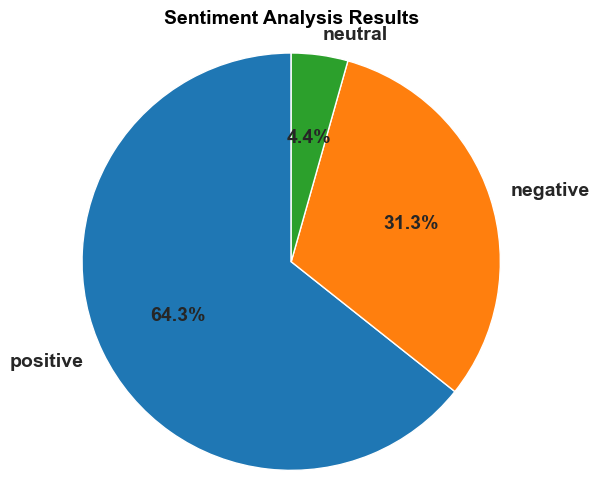

In [29]:
# Create a column for sentiment polarity
df['sentiment_polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative or neutral
df['sentiment'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Count the number of positive, negative and neutral reviews
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,  textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Sentiment Analysis Results',color='black',fontsize=14,fontweight='bold')
plt.axis('equal')
plt.show()

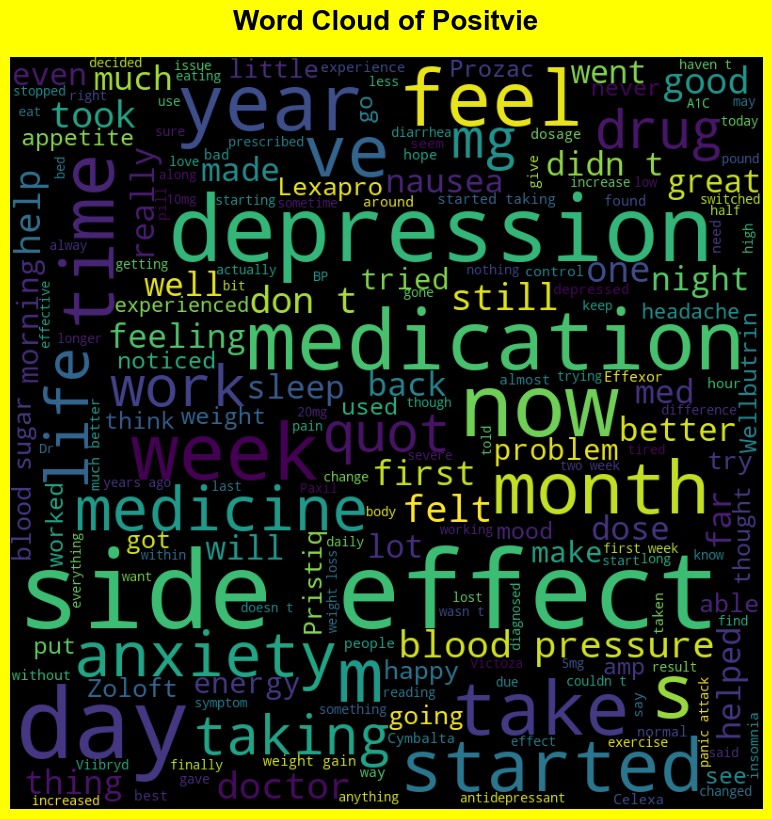

In [30]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
positive_reviews_df = df[df['sentiment_label'] == 'Positive']

# Combine all the reviews into a single string
positive_reviews_text = ' '.join(positive_reviews_df['review'].tolist())

# Create a WordCloud object with the combined text as input
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(positive_reviews_text)

# Use the WordCloud object to generate a word cloud
plt.figure(figsize=(8, 8), facecolor='yellow')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Positvie',color='black',fontweight='bold', fontsize=20, pad=20)
plt.tight_layout(pad=0)
plt.show()

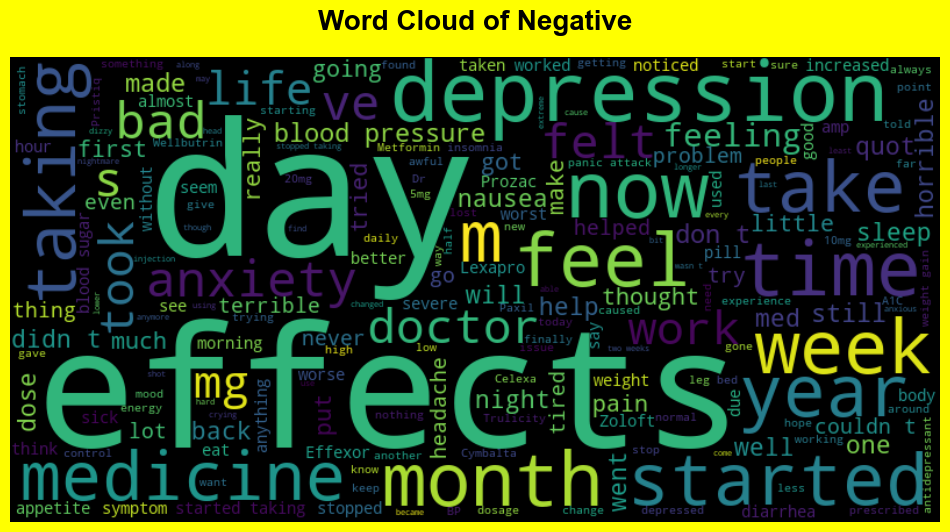

In [31]:
from wordcloud import STOPWORDS
# Extract the reviews with negative sentiment
neg_reviews = df[df['sentiment'] == 'negative']['review']

# Create a string of all the negative reviews
neg_text = ' '.join(neg_reviews)

# Remove stopwords
stopwords = set(STOPWORDS)
stopwords.update(['drug', 'side', 'effect', 'medication'])

# Generate a word cloud image for the negative reviews
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=800, height=400).generate(neg_text)

# Display the word cloud
plt.figure(figsize=(12, 8),facecolor='yellow')
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative',color='black',fontweight='bold', fontsize=20, pad=20)
plt.axis('off')
plt.show()

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models.ldamodel import LdaModel
# Create a list of stop words
stop_words = stopwords.words('english')
stop_words.extend(['would', 'could', 'like', 'much', 'really', 'even', 'still', 'think'])

# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Split into words
    words = text.split()
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text

In [33]:
# Apply the preprocess_text function to the 'review' column
df['processed_review'] = df['review'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['processed_review'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(doc.split()) for doc in df['processed_review']]

In [ ]:
# Calculate coherence scores for different numbers of topics
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
min_topics = 2
max_topics = 12
step_size = 1
coherence_scores = []
for num_topics in range(min_topics, max_topics + 1, step_size):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=df['processed_review'].apply(lambda x: x.split()), dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score:.4f}')

In [ ]:
# Visualize the coherence scores
plt.plot(range(min_topics, max_topics + 1, step_size), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.show()

In [63]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

# Define the data for the plot
data = {'num_topics': list(range(min_topics, max_topics + 1, step_size)),
        'coherence_score': coherence_scores}

# Create a ColumnDataSource object for the data
source = ColumnDataSource(data)

# Create the figure object
p = figure(title='Coherence Scores for Different Numbers of Topics',
           x_axis_label='Number of Topics',
           y_axis_label='Coherence Score')

# Add a circle glyph to the figure
p.circle(x='num_topics', y='coherence_score', source=source, size=10, color='navy')

# Add a hover tool to show the score when hovering over a point
hover = HoverTool(tooltips=[('Score', '@coherence_score{0.000}')])
p.add_tools(hover)

# Output the plot to a standalone HTML file and show it
output_file('coherence_scores.html')
show(p)

In [38]:
# Build the LDA model
lda_model = LdaModel(corpus, num_topics=11,id2word=dictionary, passes=10)

In [39]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)